In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
#import seaborn as sns
from shutil import copy
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
from sklearn.model_selection import train_test_split
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random
import os

np.random.seed(42)

DATA_DIR = "/mydrive/Dataset_Signature_Final/Dataset"

In [5]:
dir_sign = "./Dataset_Signature_Final/myDataset"
mode1='rgb'
mode2='grayscale'

In [6]:
arr_sg_gd = []
arr_sg_fs = []

In [7]:
#Load new signature image 
sign1 = load_img(dir_sign+"/signature_1.png", color_mode=mode1, target_size=(150,150))
sign2 = load_img(dir_sign+"/signature_2.png", color_mode=mode1, target_size=(150,150))
sign3 = load_img(dir_sign+"/signature_12.png", color_mode=mode1, target_size=(150,150))
sign4 = load_img(dir_sign+"/signature_14.png", color_mode=mode1, target_size=(150,150))

arr_sg_gd.append(img_to_array(sign1))
arr_sg_gd.append(img_to_array(sign2))
arr_sg_fs.append(img_to_array(sign3))
arr_sg_fs.append(img_to_array(sign4))
"""
sign1 = np.array(sign1)
sign2 = np.array(sign2)
sign3 = np.array(sign3)
sign4 = np.array(sign4)
"""
lab_gd = 1 #similar
lab_fs = 0 #not similar

lab_gd = np.array(lab_gd) #similar
lab_fs = np.array(lab_fs) #not similar

pairs = np.stack([arr_sg_gd, arr_sg_fs], axis=1)

In [8]:
print(pairs.shape)

(2, 2, 150, 150, 3)


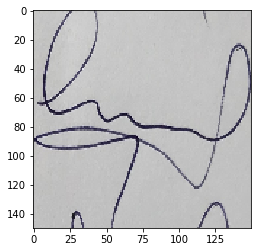

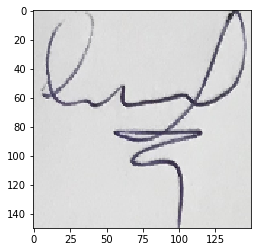

Label:  1


In [9]:
# Représentation par pairs
plt.imshow(pairs[:,0][0]/255.)
plt.show()
plt.imshow(pairs[:,1][0]/255.)
plt.show()
print("Label: ", lab_gd)

In [10]:
#Testons 
tensorflow_graph = tf.saved_model.load("hand_recog_signature_model.h5")
# Load the saved model 
detector = load_model("hand_recog_signature_model.h5")
result_pred = detector.predict([pairs[:,0], pairs[:,1]])


ValueError: Unknown layer: Functional

In [ ]:
print(str(result_pred))
for i in result_pred:
    if i >= 0.5:
      plt.imshow(pairs[:,0][0]/255.)
      plt.show()
      plt.imshow(pairs[:,1][0]/255.)
      plt.show()
      print("Label: Les Signatures sont identiques ! ")
    else:
      # Représentation par pairs
      plt.imshow(pairs[:,0][1]/255.)
      plt.show()
      plt.imshow(pairs[:,1][1]/255.)
      plt.show()
      print("Label: Les Signatures ne sont pas identiques ! ")